# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


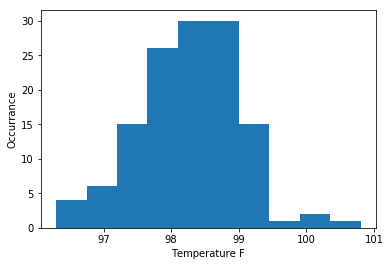

In [6]:
# 1.
import matplotlib.pyplot as plt
plt.hist(df['temperature'])
plt.xlabel('Temperature F')
plt.ylabel('Occurrance')
plt.show()

In [8]:
# not completely normally distributed

In [9]:
# 2.
len(df)

130

In [10]:
#not large, only 130 rows, yes male and female are different observations

In [17]:
# 3.
import numpy as np
import scipy.stats as st
bs_sample = np.random.choice(df['temperature'], size=len(df['temperature']))
bs_sample.mean()

98.220769230769235

In [14]:
# bootstrap mean is 98.1

In [15]:
# I would use one-sample because one sample is given

In [16]:
# since the standard deviation value is unknown, it is only appropriate to use t statistic

In [20]:
# 4
st.ttest_1samp(df['temperature'].head(10), popmean=98.6)

Ttest_1sampResult(statistic=-0.17381774143072845, pvalue=0.86585548807309409)

In [ ]:
# large pvalue

In [22]:
# 5
lower, upper = st.t.interval(0.95, len(df['temperature']), np.mean(df['temperature']), st.sem(df['temperature']))
print(lower, upper)

98.122012171 98.3764493675


In [23]:
# 6
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']
two_sample = st.ttest_ind(male_df['temperature'], female_df['temperature'])
print(two_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


In [ ]:
#use two sample test
#the male and female mean are most likely different because of low pvalue